In [1]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# udemy_folder = "/content/drive/MyDrive/0_MAESTRIA/1_TEXT/TM_udemy_reviews"
# !cp {udemy_folder}/udemy_reviews.zip udemy_reviews.zip

#### Load the libraries

In [2]:
!pip install -q -U spacy
!python -m spacy download es_core_news_md

[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.options.display.float_format = "{:,.2f}".format

### Connect to drive to get the data

In [4]:
df_udemy = pd.read_csv(f'udemy_reviews.zip', compression='zip', header=0, sep=',', quotechar='"')
df_udemy.head()

,id,course,rating,comment,user
0,73015398,1640654,2.50,como introducción esta bien pero deberían de hacerlo mas dirigido a RPA con fotos de RPAS,Jorge Alejandro Castillo
1,50586814,1640654,4.50,Los conocimientos son claros y concisos para lo requerido,Jaime Medina
2,49880684,1640654,5.00,hermoso,Adrián Antonio Herrera Castro
3,47366486,1640654,5.00,Excelente !!!,Márcio Maurício Soares do Nascimento
4,79933910,88380,5.00,Excelente todo!,Emilio Monarrez Hernandez


In [5]:
df_news = df_udemy

In [6]:
# Aplica pos/neg
df_news['tag']=df_news['rating'].apply(lambda x: 'pos' if x >= 4 else 'neg')
# Filtra los que solamente dicen una palabra (ej. "Excelente!")
#df_news = df_news[df_news['comment'].str.contains("\s")]
# Filtra los que tienen menos de 5 palabras
df_news = df_news[df_news['comment'].str.split().str.len().gt(4)]
# Filtra los que dicen menos de 12 letras (ej. "Excelente!")
df_news = df_news[df_news['comment'].str.len() >= 12]
# df_news = df_news[df_news['tag']=='neg']#.sample(2000)
# Subsampling de los positivos
df_news = pd.concat([df_news[df_news['tag']=='neg'], df_news[df_news['tag']=='pos'].sample(18883)])

df_news.reset_index(inplace=True)
display(df_news.sample(10))

# Recomendación:
# usar los comentarios con >=5 palabras


,index,id,course,rating,comment,user,tag
35665,161850,18870662,1073874,4.50,"todo estuvo genial, el curso es buen especifico a pesar de su corto tiempo, excelente idea de agregar material de lectura para su mejor comprensión.",Evelyn Olivares sepulveda,pos
31554,34524,27621788,860984,5.00,Fantástico hasta el momento. Muy bien explicado y permite adquirir agilidad rápidamente.,Julio Alberto Torres Cordero,pos
14265,131614,89571268,3235773,2.50,"Esta bien explicado, pero falto la parte donde se configura el crud del backend, o sea, esta el inicio, el final, pero falta lo que mas me interesaba que era la parte de comunicación a la base datos",Claudio KAINER,neg
12401,113137,52454640,1572996,3.50,"El curso para entender los conceptos básicos es correcto y más siendo gratuito, pero que continuamente repita blockchange en vez de blockchain me chirria en los oidos. Por lo demas bien.",Jose maria Bernal moreira,neg
7899,71619,43636538,2258224,3.50,"estuvo bueno, un poco básico, pero se entiende perfecto todo.",Diego Gil Mora,neg
12547,115052,19799366,405252,1.00,"Lo siento. Mal puedo emitir una opinión cuando aún no he visto el contenido del curso.\nAgradeceré que me presente la encuesta una vez terminado el primer ciclo.\n\nAtentamente,\n\nEnrique",Enrique Soto Pinto,neg
5839,53475,87984194,2478650,2.50,El docente debería preparar mejor la clase y mejorar su dicción,Viviana,neg
37022,38714,80400704,2819881,5.00,"Muy buen resumen en general de Git/Github, ofrece todo lo basico que debes saber para arrancar con los repositorios. Felicidades a la profesora.",Rodrigo Duarte Barrientos,pos
27082,20390,53504330,2599520,5.00,Excelente curso. Es práctico y conciso. Éxito,Pedro Antonio Ramírez Alcántara,pos
6275,57586,28716810,1176230,3.00,"Hasta el momento no podría decirlo, las lecciones las siento muy fraccionadas",Carlos Jaramillo,neg


In [52]:
# Importo excel con el subsampling ya efectuado (con la semilla empleada)
df_news = pd.read_csv('udemy_reviews_with_topics_neg_pos_subsamplin.csv.zip')

In [53]:
display(df_news.sample(10))

,index,id,course,rating,comment,user,tag,comment_cleaned,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
31293,36517,27034454,448168,5.00,"Excelente curso, cumple con las expectativas de cualquier principiante",Yuglys Josefina Marcano Siso,pos,"['cumple', 'expectativas', 'cualquier', 'principi']",0.02,0.82,0.02,0.02,0.02,0.02,0.02,0.02,0.02
25882,173893,73246830,1283744,5.00,La verdad que me ha resultado un curso muy entretenido de hacer y me ha servido para iniciarme en el mundillo de la programación de juegos con python.,Miguel Serrano,pos,"['verdad', 'resultado', 'entretenido', 'hacer', 'servido', 'iniciarme', 'mundillo', 'programacion', 'juegos', 'python']",0.01,0.01,0.01,0.01,0.41,0.01,0.01,0.01,0.51
26382,15911,87963516,3971238,5.00,"muy claras las sesiones, se aprende mucho",Fausto Naranjo,pos,"['claras', 'sesiones', 'aprend']",0.03,0.32,0.03,0.03,0.03,0.03,0.03,0.03,0.49
23653,79986,57007356,1248090,5.00,"Si, buena elección, ya que deseo comenzar desde cero para reafirmar mi conocimiento previo.\nHe realizado buena práctica.",Jerónimo Olivo González,pos,"['eleccion', 'deseo', 'comenzar', 'cero', 'reafirmar', 'conocimiento', 'previo', 'realizado', 'pract']",0.01,0.30,0.01,0.63,0.01,0.01,0.01,0.01,0.01
31819,59436,25756462,981658,5.00,MUY BUENA POR EL MOMENTO,Silvia Arrieta Ramirez,pos,"['buena', 'moment']",0.04,0.04,0.37,0.37,0.04,0.04,0.04,0.04,0.04
26569,1130,88823418,1698124,5.00,"muy bueno el curso, de mucha utilidad y con ejemplos muy cheveres",Gabriela Guevara,pos,"['mucha', 'utilidad', 'ejemplos', 'chever']",0.02,0.02,0.82,0.02,0.02,0.02,0.02,0.02,0.02
12433,113545,87280990,2507614,3.50,Es una buena oportknidad para aprender,Daniel Alejandro Moronta Perozo,neg,"['oportknidad', 'aprend']",0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.56
15499,144550,70353648,1928314,3.50,Es muy bueno como introductorio a Laravel,Claudio Zwitkovits,neg,"['introductorio', 'laravel']",0.04,0.04,0.04,0.04,0.70,0.04,0.04,0.04,0.04
17276,160049,74403316,1229836,3.50,Hasta el momento es muy bueno en contenido y la explicación de los temas es muy clara,José de Jesús Cano Ortiz,neg,"['momento', 'contenido', 'explicacion', 'temas', 'cl']",0.02,0.02,0.52,0.02,0.02,0.35,0.02,0.02,0.02
1790,16855,68379521,2213720,2.50,"los materiales de trabajo, debio ser lo mismo que el utilizaba, ya que solo nos proporciono pdf.",Jose Luis Villalba,neg,"['materiales', 'trabajo', 'debio', 'mismo', 'utilizaba', 'solo', 'proporcion']",0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.89,0.01


In [54]:
sum(df_news.tag == 'neg')

18883

In [55]:
sum(df_news.tag == 'pos')

18883

In [56]:
df_news[df_news['id'].isin([76629358,52215828])]

,index,id,course,rating,comment,user,tag,comment_cleaned,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
988,9035,52215828,1922200,3.00,"El contenido es claro e interesante, ya he tomado un par de cursos con Fabian y me han sido de mucha utilidad. Encontré deficiencias en el material de apoyo y la sección 22. El lanzamiento no fue muy clara, pero en general se adquiere un gran conocimiento de scrum scale",Diana Forero,neg,"['contenido', 'claro', 'interesante', 'tomado', 'fabian', 'sido', 'mucha', 'utilidad', 'encontre', 'deficiencias', 'material', 'apoyo', 'seccion', 'lanzamiento', 'clara', 'general', 'adquiere', 'gran', 'conocimiento', 'scrum', 'scal']",0.00,0.00,0.00,0.96,0.00,0.00,0.00,0.00,0.00
5991,54928,76629358,3446356,3.50,"Buenos días, si estás leyendo este comentario, te recomiendo leerlo entero para tener un contexto global del por que dejo solo 3 estrellas. Primero dejaré unos puntos clave y luego la explicación.\n\nPrólogo: Enhorabuena a Nicolas Schurmann por su trabajo y acercar a más gente al mundo del desarrollo, y enhorabuena por el curso que pese a no cuadrar conmigo está muy bien.\n\nPrimero: El curso lo recibí de forma gratuita por una promoción.\nSegundo: Lo explicado en el curso, está bien explicado.\nTercero: Recomiendo el curso a cualquier persona que no tenga ningún conocimiento del mundo de desarrollo.\nCuarto: No recomiendo el curso a las personas que ya tengan contacto con el mundo del desarrollo. \nQuinto: Soy desarrollador Junior trabajando con lenguajes POO como Java y C# en mi día a día. \nSexto: A la hora de escribir este comentario miré y practiqué hasta la sección 12 (inclusive).\n\nExposición: \nEl título expone muchas tecnologías, cosa que ya me decía que faltarían aspectos interesantes por tocar, yo ya se lo básico de HTML, CSS y algo más avanzado en MySQL, no se que es Flask y no conocía la sintaxis de Python. Mi interés en este curso es principalmente Python, nada más, aún que veré el resto de secciones por si acaso. \n\nDicho esto la sección de Python me parece demasiado básica, echando en falta explicación de conceptos como; ámbito de vida de las variables, uso de variables de forma global, funcionamiento extendido a la hora de iterar diccionarios y otro tipo de colecciones, propagación de excepciones y algunos temas más avanzados. \n\nPilares de la OO, se explica la creación de clases y su herencia, pero no se explican conceptos como el polimorfismo que me parece de vital importancia en la POO, tampoco se hace mención a la abstracción y el encapsulamiento, pese a explicar la creación de funciones en clases al ser python un lenguaje no tipado (o poco tipado) no queda claro el tema del encapsulamiento, no se explica en el curso, en las clases creadas siempre se tiene acceso a las propiedades y eso va en contra de este principio.\n\nEn un capítulo se explica la recursividad, es algo muy potente pero que si no se tienen conocimientos puede dar pie a confusión y errores, desearía algún ejemplo más de recursividad para los más inexpertos. \n\nEn resumen, falta un poco de explicación teórica sobre los principios de la POO y falta algo más de contenido sobre Python, lo explicado está perfectamente explicado (menos la recursividad en mi opinión). \n\nCon el título ""python sin fronteras"" esperaba mucho más contenido sobre python, como dije el curso lo recomiendo a cualquier persona que quiera iniciarse, pero si ya controlas aún que sea como junior algún lenguaje de programación, no creo que este curso sea para ti. \n\nMe sabe mal dejar tan baja puntuación a Nicolas Schurmann por que su contenido es muy bueno, tanto en esta plataforma como en otras, pero no me queda más remedio que ser objetivo, quizás si el título fuera algo así como ""Iniciación en Python"" o algo similar no hubiera escrito este comentario y le hubiera dado 4.5 estrellas o 5, ya que es 100% apto para los no iniciados. \n\nSin más me despido, un saludo y espero os toméis este comentario como lo que es,

In [57]:
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.corpora import Dictionary
# from gensim.models.wrappers import LdaMallet


In [58]:
df_news['tag'].value_counts()

neg    18883
pos    18883
Name: tag, dtype: int64

In [59]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37766 entries, 0 to 37765
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            37766 non-null  int64  
 1   id               37766 non-null  int64  
 2   course           37766 non-null  int64  
 3   rating           37766 non-null  float64
 4   comment          37766 non-null  object 
 5   user             37765 non-null  object 
 6   tag              37766 non-null  object 
 7   comment_cleaned  37766 non-null  object 
 8   topic_0          37766 non-null  float64
 9   topic_1          37766 non-null  float64
 10  topic_2          37766 non-null  float64
 11  topic_3          37766 non-null  float64
 12  topic_4          37766 non-null  float64
 13  topic_5          37766 non-null  float64
 14  topic_6          37766 non-null  float64
 15  topic_7          37766 non-null  float64
 16  topic_8          37766 non-null  float64
dtypes: float64(1

#Data Preprocessing

We defined a list of custom words to be exclude from our dataset

Create the cleaner function to clean the spanish text, remove non alpha numeric characters, remove duplicate, remove spanish accutes, remove digits

In [60]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

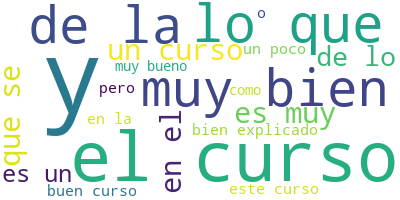

In [61]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_news['comment'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=20, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


In [62]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))

black_list = ['excelente', 'buen','bien',
              'muchas', 'gracias', 'curso','course','good'
              ]

additional_stopwords=set(black_list)

stopwords_sp = stop.union(additional_stopwords)

from nltk.stem import SnowballStemmer
spanish_stemmer = SnowballStemmer('spanish')
def stemmization(texts):
    texts = re.sub(r"""
                   [,.;@#?!&$]+  # Accept one or more copies of punctuation
                   \ *           # plus zero or more copies of a space,
                   """,
                   " ",          # and replace it with a single space
                   texts, flags=re.VERBOSE)
    return spanish_stemmer.stem(texts).split()


import spacy
nlp = spacy.load('es_core_news_md')
def lemmatization(texts, allowed_postags=['NOUN']):
    #x = nlp(texts)
    #print([(xx.text,xx.pos_) for xx in x])
    texts_out = [ token.text for token in nlp(texts) if token.pos_ in 
                 allowed_postags and token.text not in black_list and len(token.text)>2]
    return texts_out

In [63]:
%%time
bigram = gensim.models.Phrases(df_news['comment'].to_list()) 

Wall time: 3.66 s


In [64]:
def cleaner(word):
    word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)
    word = re.sub(r'(?::|;|=)(?:-)?(?:\)|\(|D|P)', "", word)
    word = re.sub(r'ee.uu', 'eeuu', word)
    word = re.sub(r'\#\.', '', word)
    word = re.sub(r'\n', '', word)
    word = re.sub(r',', ' ', word)
    word = re.sub(r'\-', ' ', word)
    word = re.sub(r'\.{3}', ' ', word)
    word = re.sub(r'a{2,}', 'a', word)
    word = re.sub(r'é{2,}', 'é', word)
    word = re.sub(r'i{2,}', 'i', word)
    word = re.sub(r'ja{2,}', 'ja', word) 
    word = re.sub(r'á', 'a', word)
    word = re.sub(r'é', 'e', word)
    word = re.sub(r'í', 'i', word)
    word = re.sub(r'ó', 'o', word)
    word = re.sub(r'ú', 'u', word)  
    word = re.sub('[^a-zA-Z]', ' ', word)
    wordlist = [ token for token in nltk.word_tokenize(word) if token.lower() not in stopwords_sp and len(token)>3 ]
    wordlist = [x for x in wordlist if not any(string for string in black_list if string in x)]
    word = " ".join(wordlist)
    list_word_clean = []
    for w1 in word.split(r"\s"):
        if  w1.lower() not in stopwords_sp:
            list_word_clean.append(w1.lower())

    bigram_list = bigram[list_word_clean]
    out_text = stemmization(" ".join(bigram_list))
    return out_text

In [65]:
cleaner('Curso. Gracias amigo me adentraste e informaste como publicar mejor en Facebook Ads , recomendación mejora tu dicción	')

['amigo',
 'adentraste',
 'informaste',
 'publicar',
 'mejor',
 'facebook',
 'recomendacion',
 'mejora',
 'diccion']

Create the function for select **only nouns** for our data, this way we are removing adverb, adjetives, verbs, etc. This is doing with spacy

For gensim we need a list of text, so we need do convert the dataframe to list

In [66]:
stemmization('Curso. Gracias amigo me adentraste e informaste como publicar mejor en Facebook Ads , recomendación mejora tu dicción')

['curso',
 'gracias',
 'amigo',
 'me',
 'adentraste',
 'e',
 'informaste',
 'como',
 'publicar',
 'mejor',
 'en',
 'facebook',
 'ads',
 'recomendacion',
 'mejora',
 'tu',
 'diccion']

In [67]:
lemmatization('Curso. Gracias amigo me adentraste e informaste como publicar mejor en Facebook Ads , recomendación mejora tu dicción	')

['amigo', 'recomendación', 'dicción']

In [68]:
len(df_news)

37766

In [69]:
# !python -m spacy download es_core_news_md

In [70]:
df_news['comment'].sample(3)

25738                                                                                                                                                     si es muy buena eleccion,
32978                                                                                                                        Me gusto la forma de explicar y presentar los ejemplos
11848    Sirve para aquellos con cero conocimiento de Django, aunque en algunos puntos no se profundiza los temas, cumple con el título, es una prueba de una app creada con Django
Name: comment, dtype: object

In [71]:
cleaner(df_news['comment'].iloc[3])

['detallado',
 'menos',
 'leido',
 'calidad',
 'seria',
 'superior',
 'tema',
 'explicar',
 'leer',
 'men']

The Cleaner function work properly

##### Let's clean all the text

In [72]:
from tqdm import tqdm
tqdm.pandas()

df_news['comment_cleaned'] = df_news['comment'].progress_apply(cleaner)

100%|██████████| 37766/37766 [00:08<00:00, 4604.40it/s]


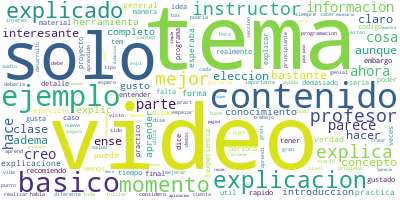

In [73]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list([' '.join(map(str, l)) for l in df_news['comment_cleaned']]))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


Now we need to build the *corpus* and the *dictionary* that gensim need to work, to do that we need to pass a list of list of tokens

In [74]:
# las palabras "curso,clase" son stopwords

In [75]:
df_news['comment_cleaned'].iloc[200:210]

200                                                                                                                                                                                                                                                                 [rapido, apuntes, practico, demostrativo, educacional, funcionan, enlac]
201                                                                                                                                                                                                                       [videos, excesivamente, cortos, plano, soldar, piezas, tarjetas, listado, material, existe, tienda, digital, sirv]
202                                                                                                                                                                                                                                                                                                               [aprendio, cosas, general]
2

In [76]:
dictionary = Dictionary(df_news['comment_cleaned'].to_list())
dictionary.compactify()
# Filter extremes
#dictionary.filter_extremes(no_below=5, no_above=0.3)#, keep_n=10000)
#dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.filter_extremes(no_below=5, no_above=0.2, keep_n=None)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in df_news['comment_cleaned'].to_list()]

# MODELADO

Comparando:
Latent Dirichlet Allocation (LDA), 
Latent semantic analysis (LSA), 
Hierarchical Dirichlet Process (HDP)

Para evaluar los topics, usamos **topic coherence** (una medida de interpretación de topics).

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [32]:
%%capture
!pip install pyLDAvis==2.1.2

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from collections import Counter
import numpy as np
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
#from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim import corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nicol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# LDA MODEL

In [35]:
def display_topics(model, model_type="lda"):
    for topic_idx, topic in enumerate(model.print_topics()):
        print ("Topic %d:" % (topic_idx))
        if model_type== "hdp":
            print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
        else:
            print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")

In [36]:
seed = 1

Find out the optimal number of topics for the LDA model based on the coherence metric:

In [37]:
from tqdm import tqdm

def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
#     for num_topics in [10, 15, 20, 25]:
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, chunksize=2000000, num_topics=num_topics, id2word=dictionary, iterations = 2000, passes=10, random_state = seed)
#         lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, iterations = 2, passes=1, random_state = seed)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
#     x = [10, 15, 20, 25]
    
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

In [38]:
%%time
import time
start = time.time()
# ldalist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['comment_cleaned'].to_list(), limit=31)
# ldalist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=df_news['comment_cleaned'].to_list(), limit=12)

end = time.time()
print(end - start)

0.0
Wall time: 0 ns


For this model it seems that  10, again we must to check the keywords too.

In [39]:
from tqdm import tqdm_notebook

def evaluate_best_seed(dictionary, corpus, texts, num_topics):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    random_seeds = np.random.randint(100000, size=(30))

    cm_max=0
    lda_max=0
    seed_max=0
    lda_list=[]
    c_v=[]

    for seed in tqdm_notebook(random_seeds, 
                         total=len(random_seeds), 
                         desc="LDA processing"):
        ldamodel_temp = LdaModel(corpus=corpus, chunksize=2000000, num_topics=num_topics, id2word=dictionary, iterations = 2000, passes=10, random_state = seed)
        lda_list.append(ldamodel_temp)
        cm = CoherenceModel(model=ldamodel_temp, texts=texts, dictionary=dictionary, coherence='c_v')
        cm_temp = cm.get_coherence()
        c_v.append(cm_temp)
        if cm_temp>cm_max:
          lda_max=ldamodel_temp
          seed_max=seed
          cm_max=cm_temp
        
    # Show graph
    x = range(len(random_seeds))
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lda_max, seed_max

In [40]:
# num_topics=10
# ldamodel, best_seed = evaluate_best_seed(dictionary=dictionary, corpus=corpus, texts=df_news['comment_cleaned'].to_list(), num_topics=num_topics)
# doc_lda = ldamodel[corpus]
# best_seed

In [88]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.test.utils import datapath
from gensim.models.ldamodel import LdaModel
import shutil

# # Save model to disk.
# !rm -rf model
# !mkdir model
# !rm -rf {udemy_folder + '/model'}
# ldamodel.save("model/lda.model")

# try:
#   shutil.copytree('model', udemy_folder + '/model')
# except:
#   pass

# Load a potentially pretrained model from disk.
ldamodel = LdaModel.load("model/lda_pos_neg_analisis_sampling_pos_50_18k_9_topics.model")

In [89]:
# Print the fist 6 Keywords in the 10 topics
ldamodel.print_topics(30, 30)

[(0,
  '0.029*"cosas" + 0.010*"explica" + 0.010*"profesor" + 0.009*"hace" + 0.008*"solo" + 0.007*"hacer" + 0.006*"mejor" + 0.006*"explicar" + 0.006*"instructor" + 0.006*"ense" + 0.006*"cada" + 0.006*"explicaciones" + 0.006*"creo" + 0.006*"aprender" + 0.006*"tiempo" + 0.006*"videos" + 0.006*"entender" + 0.006*"video" + 0.005*"falta" + 0.005*"cuenta" + 0.004*"aprendido" + 0.004*"ahora" + 0.004*"forma" + 0.004*"tema" + 0.004*"poder" + 0.004*"datos" + 0.004*"manera" + 0.004*"verdad" + 0.004*"ejemplo" + 0.004*"puede"'),
 (1,
  '0.029*"explicado" + 0.029*"basico" + 0.014*"paso" + 0.012*"ense" + 0.011*"tem" + 0.011*"demasiado" + 0.010*"bas" + 0.010*"tema" + 0.009*"facil" + 0.009*"contenido" + 0.007*"entend" + 0.007*"explica" + 0.007*"informacion" + 0.007*"practico" + 0.006*"conocimiento" + 0.006*"personas" + 0.006*"aprender" + 0.006*"sencillo" + 0.005*"detall" + 0.005*"bastante" + 0.005*"nivel" + 0.005*"rapido" + 0.005*"explicaciones" + 0.005*"empezar" + 0.005*"parece" + 0.005*"instructor" + 

In [90]:
%%capture
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [91]:
num_topics = 9
doc_lda = ldamodel[corpus]

In [92]:
len(corpus)

37766

In [93]:
# Mi hipótesis es que no coinciden los corpus
# pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

In [94]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=          x     y  topics  cluster  Freq
topic                                   
4     -0.04 -0.01       1        1 15.36
0     -0.04  0.01       2        1 15.21
8      0.06 -0.02       3        1 11.33
5     -0.03  0.03       4        1 10.69
7     -0.09 -0.01       5        1 10.50
1      0.04 -0.14       6        1  9.86
6     -0.13  0.01       7        1  9.81
3      0.06  0.13       8        1  9.28
2      0.17 -0.00       9        1  7.96, topic_info=            Term     Freq    Total Category  logprob  loglift
311     eleccion 1,379.00 1,379.00  Default    30.00    30.00
145  explicacion 2,024.00 2,024.00  Default    29.00    29.00
35        explic   905.00   905.00  Default    28.00    28.00
365    explicado 1,775.00 1,775.00  Default    27.00    27.00
325       basico 1,763.00 1,763.00  Default    26.00    26.00
..           ...      ...      ...      ...      ...      ...
92   informacion   145.97 1,772.20   Topic9    -5.15     0.03
846         cada   127.58 1,274.97   Topic9    -5.28     0.23
143       espero   106.19   590.94   Topic9    -5.47     0.81
362     entender   110.71 1,101.76   Topic9    -5.43     0.23
142        cosas   110.57 2,029.38   Topic9    -5.43    -0.38

[755 rows x 6 columns], token_table=      Topic  Freq     Term
term                      
1418      5  0.89  abarcan
3759      2  0.12    about
3759      6  0.03    about
3759      7  0.82    about
3759      9  0.02    about
...     ...   ...      ...
2459      9  0.04  windows
2498      2  0.09     with
2498      5  0.02     with
2498      6  0.02     with
2498      7  0.87     with

[2634 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 9, 6, 8, 2, 7, 4, 3])

### Comparing the Model Coherence of the Best Models

we made 3 models, now let's compare each other's  coherence

In [95]:
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [96]:
lda_coherence = CoherenceModel(topics=ldatopics, texts=df_news['comment_cleaned'].to_list(), dictionary=dictionary, window_size=10).get_coherence()
lda_coherence

0.31657623842327

In [97]:
display_topics(ldamodel)

Topic 0:
cosas explica profesor hace solo hacer mejor explicar instructor ense 

Topic 1:
explicado basico paso ense tem demasiado bas tema facil contenido 

Topic 2:
eleccion explica momento sido ahora gusta clar bastante mejor util 

Topic 3:
explic claro momento eleccion gusto pract buena parece explicacion expl 

Topic 4:
informacion conceptos ejemplos tema tener introduccion mejor parte conocimientos contenido 

Topic 5:
explicacion ejemplos clara hacer solo bastante explicado tiempo mejor parte 

Topic 6:
audio explica videos video podria mejorar calidad conceptos mejor parte 

Topic 7:
temas videos solo hace habla contenido video conocimientos demasiado gust 

Topic 8:
explicar bastante forma mundo aprend manera completo explica facil seguir 



We can see that the **LdaModel** model **with 8 topics** has the higher value of
coherence

In [98]:
display_topics(ldamodel)

Topic 0:
cosas explica profesor hace solo hacer mejor explicar instructor ense 

Topic 1:
explicado basico paso ense tem demasiado bas tema facil contenido 

Topic 2:
eleccion explica momento sido ahora gusta clar bastante mejor util 

Topic 3:
explic claro momento eleccion gusto pract buena parece explicacion expl 

Topic 4:
informacion conceptos ejemplos tema tener introduccion mejor parte conocimientos contenido 

Topic 5:
explicacion ejemplos clara hacer solo bastante explicado tiempo mejor parte 

Topic 6:
audio explica videos video podria mejorar calidad conceptos mejor parte 

Topic 7:
temas videos solo hace habla contenido video conocimientos demasiado gust 

Topic 8:
explicar bastante forma mundo aprend manera completo explica facil seguir 



It looks like the topics are:
* Topic 0: felicitaciones
* Topic 1: expectativas
* Topic 2: experiencia
* Topic 3: contenido
* Topic 4: instructor
* Topic 5: material
* Topic 6: video
* Topic 7: lenguaje
* Topic 8: ejercicios
* Topic 9: titulo
* Topic 10: temas
* Topic 11: explicación


Let´s check the keyword when we selecting another number of topics (14)

# Classifiying all documents

now that we have been select the best model and topics number, is time to assign a topic to each document, means **cluster** according to the topics

In [99]:
from tqdm.notebook import tqdm_notebook

def format_topics_sentences(ldamodel=0, doc_lda=None, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in (enumerate(doc_lda)):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic_number', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel, doc_lda=doc_lda, texts=df_news['comment_cleaned'].to_list())



In [100]:
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic_number', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic_number,Topic_Perc_Contrib,Keywords,Text
0,0,7.00,0.55,"temas, videos, solo, hace, habla, contenido, video, conocimientos, demasiado, gust","[introduccion, deberian, hacerlo, dirigido, fotos, rp]"
1,1,2.00,0.56,"eleccion, explica, momento, sido, ahora, gusta, clar, bastante, mejor, util","[explican, mayori]"
2,2,6.00,0.92,"audio, explica, videos, video, podria, mejorar, calidad, conceptos, mejor, parte","[pronto, evaluarlo, comparandolo, calidad, bajo, pueden, descargar, archivos, estan, sonido, malo, escucha, turbi]"
3,3,7.00,0.92,"temas, videos, solo, hace, habla, contenido, video, conocimientos, demasiado, gust","[detallado, menos, leido, calidad, seria, superior, tema, explicar, leer, men]"
4,4,5.00,0.91,"explicacion, ejemplos, clara, hacer, solo, bastante, explicado, tiempo, mejor, parte","[parece, podria, algun, peque, repaso, terminos, comunes, ademas, ejempl]"
5,5,0.00,0.77,"cosas, explica, profesor, hace, solo, hacer, mejor, explicar, instructor, ense","[parte, profesor, mismo, gratis, especializado, hacking, igualmente, explic]"
6,6,6.00,0.87,"audio, explica, videos, video, podria, mejorar, calidad, conceptos, mejor, parte","[gusto, hacking, python, aprende, python, hacking]"
7,7,7.00,0.72,"temas, videos, solo, hace, habla, contenido, video, conocimientos, demasiado, gust","[habla, hacking, apartados, solo, decepcion]"
8,8,3.00,0.60,"explic, claro, momento, eleccion, gusto, pract, buena, parece, explicacion, expl","[introduccion, breve, rapida, lenguaje, programacion, python, auditoria, informatica, final, breve, ejemplo, hacer, cumplido, exactamente, expectativas, reconocer, tutor, esforzado, involucrado, ejemplos, lenguaj]"
9,9,1.00,0.90,"explicado, basico, paso, ense, tem, demasiado, bas, tema, facil, contenido","[parecio, super, personas, quieran, iniciarse, lenguaje, programacion, python]"


In [101]:
topic_vec = np.array([0] * num_topics) 
print(topic_vec)
topic_vec[0]=10
print(topic_vec)


[0 0 0 0 0 0 0 0 0]
[10  0  0  0  0  0  0  0  0]


In [102]:
from tqdm import tqdm_notebook

#corpus_i = corpus[1000]
corp_list = []
for ii,doc_lda_ii in enumerate(doc_lda):
  #top_topics = (lda_model.get_document_topics(corp_ii,
  #                                      minimum_probability=0.0)
  #)
  #topic_vec = [top_topics[i][1] if top_topics[i][1]>0.1 else 0 for i in range(num_topics)]
  topic_vec = [0] * num_topics
  for yy,zz in doc_lda_ii:
    #if zz>0.1:
      topic_vec[yy] = zz

  corp_list.append(topic_vec)

## Análisis de topicos

<AxesSubplot:>

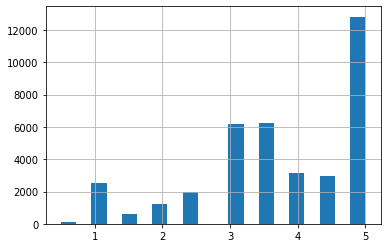

In [103]:
df_news.rating.hist(bins=20)

In [104]:
dg_topics = pd.DataFrame(corp_list)
dg_topics.tail(10)

,0,1,2,3,4,5,6,7,8
37756,0.03,0.78,0.03,0.03,0.03,0.03,0.03,0.03,0.03
37757,0.02,0.02,0.30,0.02,0.57,0.02,0.02,0.02,0.02
37758,0.03,0.03,0.03,0.31,0.03,0.03,0.03,0.49,0.03
37759,0.67,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.26
37760,0.03,0.03,0.78,0.03,0.03,0.03,0.03,0.03,0.03
37761,0.00,0.00,0.00,0.31,0.00,0.44,0.00,0.23,0.00
37762,0.04,0.04,0.04,0.04,0.04,0.04,0.70,0.04,0.04
37763,0.02,0.02,0.02,0.02,0.02,0.82,0.02,0.02,0.02
37764,0.02,0.02,0.87,0.02,0.02,0.02,0.02,0.02,0.02
37765,0.03,0.78,0.03,0.03,0.03,0.03,0.03,0.03,0.03


In [105]:
df_all = pd.merge(df_news, dg_topics.add_prefix('topic_'), left_index=True, right_index=True,)
df_all.tail()

,index,id,course,rating,comment,user,tag,comment_cleaned,topic_0_x,topic_1_x,topic_2_x,topic_3_x,topic_4_x,topic_5_x,topic_6_x,topic_7_x,topic_8_x,topic_0_y,topic_1_y,topic_2_y,topic_3_y,topic_4_y,topic_5_y,topic_6_y,topic_7_y,topic_8_y
37761,26713,14260996,1075294,4.50,"Me parece un curso muy breve y rapido, se pueden aplicar rápidamente los conocimientos y tener una muy buena idea de como funciona Apache Tomcat.\n\nEn mi opinión podrian entrar un par de temas mas, como or ejemplo, como configurar un certificado SSL en Apache Tomcat y como configurarlo para trabajar con otras tecnologias, como por ejemplo PHP.\n\nSaludos!",Miguel Solis,pos,"[parece, breve, rapido, pueden, aplicar, rapidamente, conocimientos, tener, idea, funciona, apache, tomcat, opinion, podrian, entrar, temas, ejemplo, configurar, certificado, apache, tomcat, configurarlo, trabajar, tecnologias, ejemplo, salud]",0.00,0.00,0.00,0.31,0.00,0.44,0.00,0.23,0.00,0.00,0.00,0.00,0.31,0.00,0.44,0.00,0.23,0.00
37762,95801,83528168,2631714,4.00,"SI, PERO MMUY BAJO EL VOLUMEN DE LA VOZ",Paula Alessandra Rodríguez Villanueva,pos,"[mmuy, bajo, volum]",0.04,0.04,0.04,0.04,0.04,0.04,0.70,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.70,0.04,0.04
37763,118424,30743832,182682,4.50,muito bom para quem esta começando do zero,Amanda Irene Martínez Theodoro,pos,"[muito, quem, come, ando, zer]",0.02,0.02,0.02,0.02,0.02,0.82,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.82,0.02,0.02,0.02
37764,118561,18338314,182682,5.00,"La persona explica muy bien, con detalle y sin prisa cada paso.",Hector Perez,pos,"[persona, explica, detalle, prisa, cada, pas]",0.02,0.02,0.87,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.87,0.02,0.02,0.02,0.02,0.02,0.02
37765,127528,72848050,2083586,5.00,"Muy buena y muy conciso, he aprendido montones",Jean Carlo Brenes Montiel,pos,"[conciso, aprendido, monton]",0.03,0.78,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.78,0.03,0.03,0.03,0.03,0.03,0.03,0.03


In [106]:
len(df_news),len(dg_topics), len(df_all)

(37766, 37766, 37766)

In [107]:
# df_all.to_csv("udemy_reviews_with_topics_neg_pos_subsamplin.csv.zip", 
#            index=False, 
#            compression="zip")

# try:
#   shutil.copy('udemy_reviews_with_topics.csv.zip', udemy_folder + '/udemy_reviews_with_topics.csv.zip')
# except:
#   pass

In [109]:
# Análisis

In [112]:
df_all = pd.read_csv('udemy_reviews_with_topics_neg_pos_subsamplin.csv.zip')
df_all.head()

,index,id,course,rating,comment,user,tag,comment_cleaned,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
0,0,73015398,1640654,2.50,como introducción esta bien pero deberían de hacerlo mas dirigido a RPA con fotos de RPAS,Jorge Alejandro Castillo,neg,"['introduccion', 'deberian', 'hacerlo', 'dirigido', 'fotos', 'rp']",0.02,0.02,0.02,0.02,0.33,0.02,0.02,0.54,0.02
1,5,77234376,88380,3.00,Explican poco... se lee la mayoría,Tristán,neg,"['explican', 'mayori']",0.06,0.06,0.56,0.06,0.06,0.06,0.06,0.06,0.06
2,9,63379192,88380,2.00,"es muy pronto para evaluarlo, comparandolo con la calidad de otros cursos este es bajo, no se pueden descargar los archivos ya que no estan en PDF y el sonido es malo, se escucha turbio.",Karla,neg,"['pronto', 'evaluarlo', 'comparandolo', 'calidad', 'bajo', 'pueden', 'descargar', 'archivos', 'estan', 'sonido', 'malo', 'escucha', 'turbi']",0.01,0.01,0.01,0.01,0.01,0.01,0.92,0.01,0.01
3,10,59970408,88380,3.00,"Excelente, muy detallado. Si fuera menos « leído » la calidad sería superior! El tema da para explicar más y leer menos",Marianela Gamboa Sojo,neg,"['detallado', 'menos', 'leido', 'calidad', 'seria', 'superior', 'tema', 'explicar', 'leer', 'men']",0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.92,0.01
4,18,63686858,126128,3.00,"Me parece que podria dar algun pequeño repaso de terminos comunes, ademas de dar mas ejemplos",Angel Martín Vargas Castillo,neg,"['parece', 'podria', 'algun', 'peque', 'repaso', 'terminos', 'comunes', 'ademas', 'ejempl']",0.01,0.01,0.01,0.01,0.01,0.91,0.01,0.01,0.01


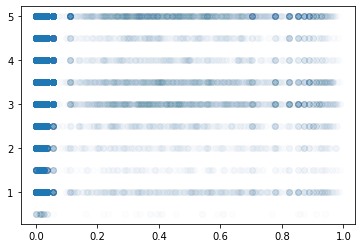

In [119]:
# Scatter % de pertenencia al tópico vs puntaje
x_topic = df_all['topic_0']
y_rating = df_all['rating']
plt.scatter(x_topic, y_rating, 
#             s=0.001, # Tamaño del punto
            alpha =0.01) # Transparencia del punto

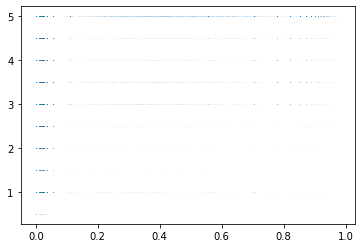

In [120]:
# Scatter % de pertenencia al tópico vs puntaje
x_topic = df_all['topic_8']
y_rating = df_all['rating']
plt.scatter(x_topic, y_rating, s=0.001, alpha =0.25)

In [121]:
# Al ser discreto se pierde 

In [122]:
# Columnas
selected_columns = ['rating']
for i in range(num_topics):
    selected_columns.append("topic_{}".format(i))
selected_columns

['rating',
 'topic_0',
 'topic_1',
 'topic_2',
 'topic_3',
 'topic_4',
 'topic_5',
 'topic_6',
 'topic_7',
 'topic_8']

In [123]:
# Correlaciones por Spearman
df_all[selected_columns].corr(method="spearman")['rating']

rating     1.00
topic_0   -0.00
topic_1    0.10
topic_2    0.20
topic_3    0.15
topic_4    0.05
topic_5    0.07
topic_6   -0.03
topic_7   -0.02
topic_8    0.23
Name: rating, dtype: float64

In [124]:
# Correlaciones por Pearson
df_all[selected_columns].corr()['rating']

rating     1.00
topic_0   -0.10
topic_1    0.03
topic_2    0.14
topic_3    0.11
topic_4   -0.04
topic_5   -0.03
topic_6   -0.16
topic_7   -0.13
topic_8    0.16
Name: rating, dtype: float64

Puntaje promedio del tópico 0: 3.4263446385748546


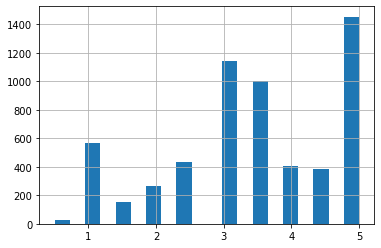

In [125]:
# Distribución de rating para el tópico 0
threshold = 0.2
df_all[df_all['topic_0']>threshold].rating.hist(bins=20)
print("Puntaje promedio del tópico 0:", df_all[df_all['topic_0']>threshold].rating.mean())

Puntaje promedio del tópico 8: 4.124778761061947


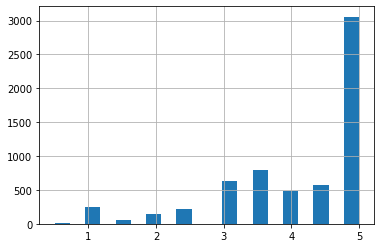

In [126]:
# Distribución de rating para el tópico 8
df_all[df_all['topic_8']>threshold].rating.hist(bins=20)
print("Puntaje promedio del tópico 8:", df_all[df_all['topic_8']>threshold].rating.mean())

In [127]:
# Excesiva presencia de reviews positivos, se debe a que la mayoría son positivos, es necesario Normalizar

In [128]:
# Cantidad total por cada rating
rating_totales = df_all.groupby("rating").count()['index'].reset_index()
rating_totales['cantidad_total'] = rating_totales['index']
rating_totales = rating_totales[['rating','cantidad_total']]
rating_totales

,rating,cantidad_total
0,0.50,95
1,1.00,2544
2,1.50,580
3,2.00,1255
4,2.50,1981
5,3.00,6190
6,3.50,6238
7,4.00,3124
8,4.50,2932
9,5.00,12827


In [129]:
# Cantidad por cada rating para tópico 0
rating_cantidad_t0 = df_all[df_all['topic_0']>threshold].groupby("rating").count()['index'].reset_index()
rating_cantidad_t0

,rating,index
0,0.50,24
1,1.00,565
2,1.50,153
3,2.00,268
4,2.50,435
5,3.00,1143
6,3.50,1006
7,4.00,404
8,4.50,386
9,5.00,1454


In [130]:
# Se divide por el total de cada rating a los efectos de obtener una cantidad normalizada
rating_cantidad_t0 = rating_cantidad_t0.merge(rating_totales)
rating_cantidad_t0['cantidad_normalizada'] = rating_cantidad_t0['index'] / rating_cantidad_t0['cantidad_total']
rating_cantidad_t0['cantidad_normalizada2'] = rating_cantidad_t0['cantidad_normalizada'] / rating_cantidad_t0['cantidad_normalizada'].sum()
rating_cantidad_t0

,rating,index,cantidad_total,cantidad_normalizada,cantidad_normalizada2
0,0.50,24,95,0.25,0.13
1,1.00,565,2544,0.22,0.12
2,1.50,153,580,0.26,0.14
3,2.00,268,1255,0.21,0.11
4,2.50,435,1981,0.22,0.12
5,3.00,1143,6190,0.18,0.10
6,3.50,1006,6238,0.16,0.09
7,4.00,404,3124,0.13,0.07
8,4.50,386,2932,0.13,0.07
9,5.00,1454,12827,0.11,0.06


<BarContainer object of 10 artists>

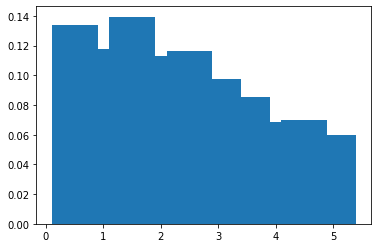

In [131]:
plt.bar(rating_cantidad_t0.rating, rating_cantidad_t0.cantidad_normalizada2)

In [159]:
# Distribución normalizada tópico i-ésimo
# Cantidad por cada rating para tópico 0
def distr_normalizada(num_topico, threshold = 0.2):
    rating_cantidad_ti = df_all[df_all[f'topic_{num_topico}']>threshold].groupby("rating").count()['index'].reset_index()
    rating_cantidad_ti = rating_cantidad_ti.merge(rating_totales)
    rating_cantidad_ti['cantidad_normalizada'] = rating_cantidad_ti['index'] / rating_cantidad_ti['cantidad_total']
    rating_cantidad_ti['cantidad_normalizada2'] = rating_cantidad_ti['cantidad_normalizada'] / rating_cantidad_ti['cantidad_normalizada'].sum()
    plt.axhline(np.mean(rating_cantidad_ti.cantidad_normalizada2), linestyle='--', color = 'red')
    plt.bar(rating_cantidad_ti.rating, rating_cantidad_ti.cantidad_normalizada2, width=0.45)
    plt.xlabel('Rating')
    plt.ylabel('Proporción Normalizada')

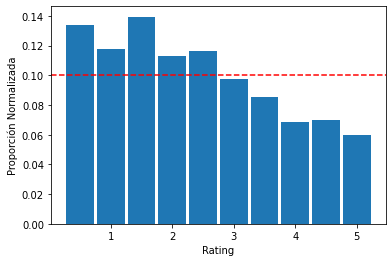

In [160]:
# Tópico 0  explicación - profesor instructor
distr_normalizada(0)

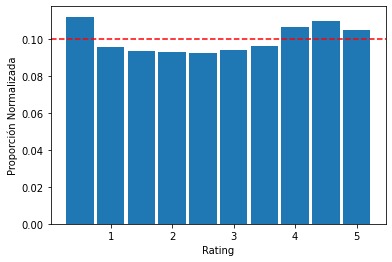

In [161]:
# Tópico 1  básico fácil
distr_normalizada(1)

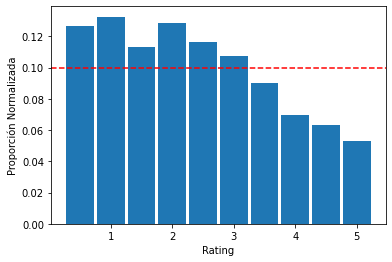

In [162]:
# Tópico 8  temas - contenidos
distr_normalizada(7)

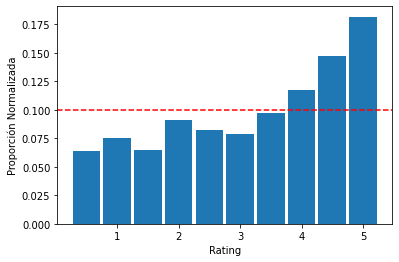

In [163]:
# Tópico 9  completo
distr_normalizada(8)

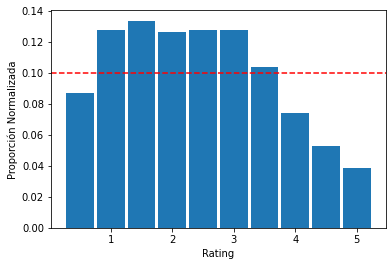

In [164]:
# Tópico 6  audio video
distr_normalizada(6)

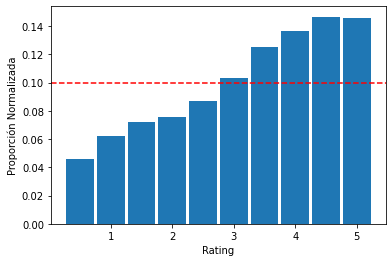

In [165]:
# Tópico 3 Claridad en la explicación
distr_normalizada(3)

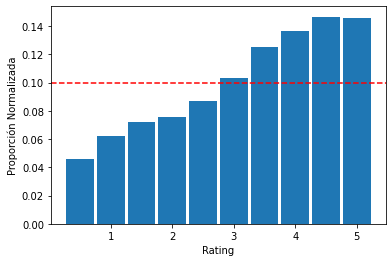

In [166]:
distr_normalizada(3)

In [167]:
# Cantidad total por cada rating
rating_cantidad_t8 = df_all[df_all['topic_8']>threshold].groupby("rating").count()['index'].reset_index()
rating_cantidad_t8

,rating,index
0,0.50,8
1,1.00,252
2,1.50,49
3,2.00,150
4,2.50,213
5,3.00,639
6,3.50,799
7,4.00,482
8,4.50,566
9,5.00,3057


In [168]:
rating_cantidad_t8 = rating_cantidad_t8.merge(rating_totales)
rating_cantidad_t8['cantidad_normalizada'] = rating_cantidad_t8['index'] / rating_cantidad_t8['cantidad_total']
rating_cantidad_t8['cantidad_normalizada2'] = rating_cantidad_t8['cantidad_normalizada'] / rating_cantidad_t8['cantidad_normalizada'].sum()
rating_cantidad_t8

,rating,index,cantidad_total,cantidad_normalizada,cantidad_normalizada2
0,0.50,8,95,0.08,0.06
1,1.00,252,2544,0.10,0.08
2,1.50,49,580,0.08,0.06
3,2.00,150,1255,0.12,0.09
4,2.50,213,1981,0.11,0.08
5,3.00,639,6190,0.10,0.08
6,3.50,799,6238,0.13,0.10
7,4.00,482,3124,0.15,0.12
8,4.50,566,2932,0.19,0.15
9,5.00,3057,12827,0.24,0.18


In [169]:
rating_cantidad_t8['cantidad_normalizada2'].sum()

1.0

<BarContainer object of 10 artists>

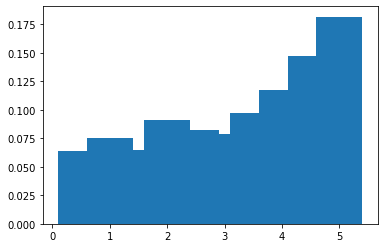

In [170]:
plt.bar(rating_cantidad_t8.rating, rating_cantidad_t8.cantidad_normalizada2)

In [171]:
# Distribución de tópicos por curso
df_curso = df_all.groupby('course').count().sort_values('index', ascending = False).reset_index()
df_curso['cantidad'] = df_curso['index']
df_curso = df_curso[['course','cantidad']]
df_curso

,course,cantidad
0,1209326,223
1,1052924,219
2,1218500,219
3,1671664,200
4,976214,199
...,...,...
3247,3012290,1
3248,1855978,1
3249,82924,1
3250,3007046,1


In [172]:
selected_columns2 = ['course']
selected_columns2  = selected_columns2 + selected_columns
selected_columns2

['course',
 'rating',
 'topic_0',
 'topic_1',
 'topic_2',
 'topic_3',
 'topic_4',
 'topic_5',
 'topic_6',
 'topic_7',
 'topic_8']

In [173]:
# Distribución de tópicos por curso
df_curso_topico_rating = df_all.groupby('course').mean().sort_values('index', ascending = False).reset_index()
df_curso_topico_rating[selected_columns2]

,course,rating,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
0,3202322,3.00,0.02,0.02,0.02,0.02,0.02,0.02,0.54,0.35,0.02
1,2241124,3.23,0.05,0.10,0.07,0.13,0.07,0.10,0.07,0.21,0.20
2,1359140,3.38,0.20,0.04,0.18,0.01,0.06,0.01,0.01,0.17,0.32
3,1253472,3.88,0.03,0.22,0.23,0.16,0.03,0.03,0.03,0.22,0.03
4,1283744,3.53,0.15,0.17,0.08,0.10,0.09,0.08,0.10,0.09,0.13
...,...,...,...,...,...,...,...,...,...,...,...
3247,3517622,3.50,0.01,0.01,0.01,0.01,0.01,0.01,0.37,0.01,0.53
3248,2307340,3.35,0.16,0.11,0.08,0.07,0.08,0.05,0.19,0.15,0.10
3249,126128,3.00,0.01,0.01,0.01,0.01,0.01,0.91,0.01,0.01,0.01
3250,88380,3.25,0.03,0.03,0.15,0.21,0.03,0.03,0.25,0.25,0.03


In [174]:
rating_original = df_udemy.groupby('course').mean()['rating'].reset_index()
rating_original

,course,rating
0,11051,4.56
1,19315,4.00
2,22820,4.14
3,23928,5.00
4,26006,4.75
...,...,...
5060,4284308,5.00
5061,4284788,1.50
5062,4287776,4.95
5063,4288376,5.00


In [175]:
df_curso_topico_rating.merge(rating_original, on='course')

,course,index,id,rating_x,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,rating_y
0,3202322,"174,140.00","93,644,240.00",3.00,0.02,0.02,0.02,0.02,0.02,0.02,0.54,0.35,0.02,3.00
1,2241124,"174,080.24","60,307,476.52",3.23,0.05,0.10,0.07,0.13,0.07,0.10,0.07,0.21,0.20,4.02
2,1359140,"174,015.75","27,305,182.00",3.38,0.20,0.04,0.18,0.01,0.06,0.01,0.01,0.17,0.32,4.38
3,1253472,"173,999.00","82,656,213.50",3.88,0.03,0.22,0.23,0.16,0.03,0.03,0.03,0.22,0.03,4.35
4,1283744,"173,929.81","53,292,397.62",3.53,0.15,0.17,0.08,0.10,0.09,0.08,0.10,0.09,0.13,4.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,3517622,108.00,"86,027,230.00",3.50,0.01,0.01,0.01,0.01,0.01,0.01,0.37,0.01,0.53,2.25
3248,2307340,63.54,"53,364,006.69",3.35,0.16,0.11,0.08,0.07,0.08,0.05,0.19,0.15,0.10,4.66
3249,126128,18.00,"63,686,858.00",3.00,0.01,0.01,0.01,0.01,0.01,0.91,0.01,0.01,0.01,3.83
3250,88380,7.75,"66,412,312.00",3.25,0.03,0.03,0.15,0.21,0.03,0.03,0.25,0.25,0.03,3.86


In [176]:
df_curso[df_curso['course']==3202322]

,course,cantidad
3039,3202322,1


In [177]:
df_curso

,course,cantidad
0,1209326,223
1,1052924,219
2,1218500,219
3,1671664,200
4,976214,199
...,...,...
3247,3012290,1
3248,1855978,1
3249,82924,1
3250,3007046,1


In [178]:
df_curso = df_curso.merge(df_curso_topico_rating)

In [179]:
sum(df_curso['cantidad']>100)

63

In [180]:
df_curso_mayor_100 = df_curso[df_curso['cantidad']>100]
df_curso_mayor_100

,course,cantidad,index,id,rating,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
0,1209326,223,"30,468.97","29,323,483.37",3.45,0.12,0.10,0.12,0.12,0.10,0.11,0.17,0.08,0.07
1,1052924,219,"168,252.10","26,227,555.03",4.10,0.11,0.11,0.12,0.10,0.16,0.07,0.07,0.13,0.11
2,1218500,219,"46,586.16","75,790,777.73",3.39,0.06,0.11,0.10,0.12,0.16,0.08,0.18,0.12,0.06
3,1671664,200,"149,434.22","50,823,608.81",3.19,0.13,0.09,0.10,0.15,0.08,0.08,0.15,0.13,0.09
4,976214,199,"105,122.90","44,922,328.76",4.19,0.12,0.11,0.15,0.13,0.11,0.10,0.09,0.07,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1175904,105,"35,896.97","39,508,864.98",3.64,0.14,0.16,0.11,0.11,0.09,0.11,0.08,0.09,0.09
59,1616826,104,"131,172.28","34,110,579.11",4.39,0.07,0.15,0.14,0.17,0.10,0.09,0.07,0.09,0.10
60,935680,104,"124,203.37","35,094,207.62",3.05,0.08,0.11,0.05,0.09,0.16,0.19,0.10,0.12,0.08
61,2518830,103,"98,567.36","56,866,093.46",2.63,0.15,0.06,0.07,0.10,0.08,0.14,0.18,0.12,0.09


In [181]:
df_curso_mayor_100[selected_columns].corr()

,rating,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8
rating,1.00,-0.12,0.13,0.65,0.28,0.01,-0.12,-0.68,-0.42,0.49
topic_0,-0.12,1.00,-0.08,-0.06,-0.40,-0.56,0.24,-0.12,-0.41,-0.05
topic_1,0.13,-0.08,1.00,0.03,0.20,-0.16,-0.16,-0.15,-0.28,-0.04
topic_2,0.65,-0.06,0.03,1.00,0.15,-0.16,-0.26,-0.40,-0.36,0.20
topic_3,0.28,-0.40,0.20,0.15,1.00,-0.04,-0.34,-0.29,0.09,0.12
topic_4,0.01,-0.56,-0.16,-0.16,-0.04,1.00,-0.17,0.02,0.20,-0.04
topic_5,-0.12,0.24,-0.16,-0.26,-0.34,-0.17,1.00,-0.08,-0.20,-0.31
topic_6,-0.68,-0.12,-0.15,-0.40,-0.29,0.02,-0.08,1.00,0.36,-0.53
topic_7,-0.42,-0.41,-0.28,-0.36,0.09,0.20,-0.20,0.36,1.00,-0.25
topic_8,0.49,-0.05,-0.04,0.20,0.12,-0.04,-0.31,-0.53,-0.25,1.00


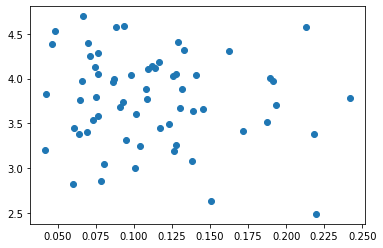

In [182]:
plt.scatter(df_curso_mayor_100.topic_0, df_curso_mayor_100.rating)

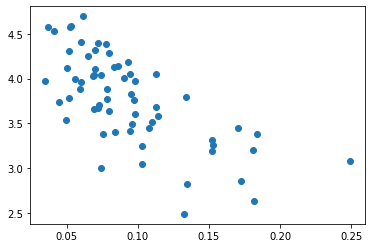

In [183]:
plt.scatter(df_curso_mayor_100.topic_6, df_curso_mayor_100.rating)

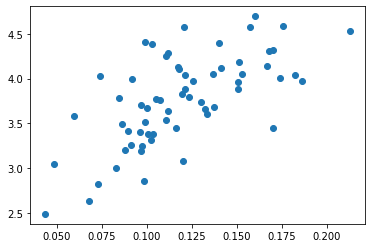

In [184]:
plt.scatter(df_curso_mayor_100.topic_2, df_curso_mayor_100.rating)

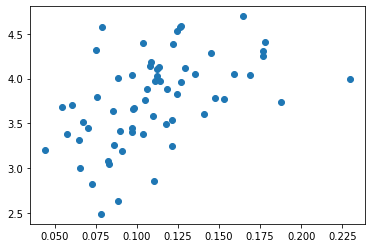

In [185]:
plt.scatter(df_curso_mayor_100.topic_8, df_curso_mayor_100.rating)

In [186]:
dg_topics.sum(axis=1).sample(10)

31522   1.00
4638    1.00
19372   1.00
28446   1.00
17113   0.96
12128   1.00
18945   1.00
21938   1.00
34797   1.00
17608   1.00
dtype: float64

In [187]:
((dg_topics.astype(bool)==False).sum(axis=1)==num_topics).sum()

0

In [188]:
len(dg_topics)

37766

<BarContainer object of 9 artists>

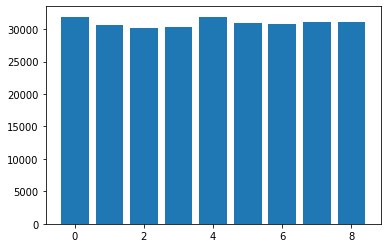

In [189]:
import matplotlib.pyplot as plt
plt.bar(dg_topics.columns, dg_topics.astype(bool).sum())

<BarContainer object of 9 artists>

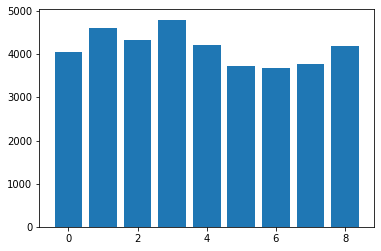

In [190]:
import matplotlib.pyplot as plt
plt.bar(dg_topics.columns, dg_topics.sum())

We selected the ldamodel with 12 topics and asigned a dominant topic to each document, now let map each topic with a label 

first let's create the dictionary

In [191]:
label_dicc = {0:'felicitaciones', 1:'expectativas', 2:'experiencia', 3: 'contenido', 4:'instructor', 5:'material', 6:'video', 
              7:'lenguaje', 8:'ejercicios', 9: 'titulo', 10:'temas', 11:'explicación'}

label_dicc = {0:"1_mas_detalles",
1:"2_pocos_ejemplos",
2:"3_mejorar_explicacion",
3:"4_nada",
4:"5_version",
5:"6_elecciones",
6:"7_demasiado_basico",
7:"8_calidad_de_video",
8:"9_mas_informacion",
9:"10_interesante",
}

In [192]:
df_dominant_topic['Dominant_Topic_number'] = df_dominant_topic['Dominant_Topic_number'].astype('int64')

In [193]:
df_dominant_topic['Dominant_Topic'] = df_dominant_topic['Dominant_Topic_number'].map(label_dicc)

df_dominant_topic.to_csv("udemy_reviews_dominant.csv.zip", 
           index=False, 
           compression="zip")

try:
  shutil.copy('udemy_reviews_dominant.csv.zip', udemy_folder + '/udemy_reviews_dominant.csv.zip')
except:
  pass

df_dominant_topic.sample(10)

,Document_No,Dominant_Topic_number,Topic_Perc_Contrib,Keywords,Text,Dominant_Topic
37717,37717,6,0.60,"audio, explica, videos, video, podria, mejorar, calidad, conceptos, mejor, parte","[eleccion, gusto, audio, bajo, parte, partes, video, flasheaba, imagen, suerte, tube, ataque, epilept]",7_demasiado_basico
36059,36059,1,0.66,"explicado, basico, paso, ense, tem, demasiado, bas, tema, facil, contenido","[tips, clases, ense, aron, ademas, clar]",2_pocos_ejemplos
26120,26120,7,0.74,"temas, videos, solo, hace, habla, contenido, video, conocimientos, demasiado, gust","[concreta, exposicion, temas, motiva, seguir, investigando, profundizando, tem]",8_calidad_de_video
29026,29026,4,0.45,"informacion, conceptos, ejemplos, tema, tener, introduccion, mejor, parte, conocimientos, contenido","[gran, profesor, demuestra, especialista, temas, trat]",5_version
29654,29654,7,0.78,"temas, videos, solo, hace, habla, contenido, video, conocimientos, demasiado, gust","[creo, puede, rap]",8_calidad_de_video
8856,8856,6,0.92,"audio, explica, videos, video, podria, mejorar, calidad, conceptos, mejor, parte","[panorama, basico, similar, diria, amigo, cafe, preguntaste, trabajo, recomendaciones, deberia, gratis]",7_demasiado_basico
1368,1368,1,0.45,"explicado, basico, paso, ense, tem, demasiado, bas, tema, facil, contenido","[corto, tendria, larg]",2_pocos_ejemplos
36109,36109,0,0.56,"cosas, explica, profesor, hace, solo, hacer, mejor, explicar, instructor, ense","[espero, poder, apartado, recomendaciones, errores, comunes, errores, afectan, seguridad, etcno, solo, configurar, general]",1_mas_detalles
20573,20573,2,0.56,"eleccion, explica, momento, sido, ahora, gusta, clar, bastante, mejor, util",[clar],3_mejorar_explicacion
31845,31845,0,0.50,"cosas, explica, profesor, hace, solo, hacer, mejor, explicar, instructor, ense","[definitivamente, nueva, oportunidad, consolidar, aprendizajes, experiencias, electoral]",1_mas_detalles


In [194]:
df_dominant_topic.isna().sum()

Document_No              0
Dominant_Topic_number    0
Topic_Perc_Contrib       0
Keywords                 0
Text                     0
Dominant_Topic           0
dtype: int64

array([<AxesSubplot:title={'center':'Dominant_Topic'}>], dtype=object)

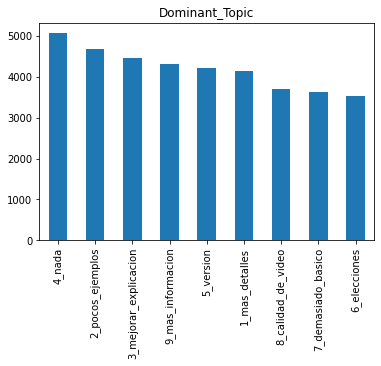

In [195]:
df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar', subplots=True)

In [196]:
% matplotlib inline

topics = df_dominant_topic['Dominant_Topic'].unique()

for topic in topics:
  df_dominant_filtered = df_dominant_topic[df_dominant_topic['Dominant_Topic']==topic][["Dominant_Topic","Text"]]
  display(df_dominant_filtered.head(3))
  # Import the wordcloud library
  from wordcloud import WordCloud
  # Join the different processed titles together.
  long_string = ','.join(list([' '.join(map(str, l)) for l in df_dominant_filtered['Text']]))
  # Create a WordCloud object
  wordcloud = WordCloud(background_color="white", max_words=30, contour_width=3, contour_color='steelblue')
  # Generate a word cloud
  wordcloud.generate(long_string)
  # Visualize the word cloud
  wordcloud.to_image()
  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


UsageError: Line magic function `%` not found.


In [197]:
df_news['labels'] = df_dominant_topic['Dominant_Topic']
df_news['label_confidence'] = df_dominant_topic['Topic_Perc_Contrib']
df_news["labels"].fillna("X",inplace=True)

Let's examine some text and its topics

In [198]:
df_news[['comment', 'labels']].head(10)

,comment,labels
0,como introducción esta bien pero deberían de hacerlo mas dirigido a RPA con fotos de RPAS,8_calidad_de_video
1,Explican poco... se lee la mayoría,3_mejorar_explicacion
2,"es muy pronto para evaluarlo, comparandolo con la calidad de otros cursos este es bajo, no se pueden descargar los archivos ya que no estan en PDF y el sonido es malo, se escucha turbio.",7_demasiado_basico
3,"Excelente, muy detallado. Si fuera menos « leído » la calidad sería superior! El tema da para explicar más y leer menos",8_calidad_de_video
4,"Me parece que podria dar algun pequeño repaso de terminos comunes, ademas de dar mas ejemplos",6_elecciones
5,Una parte del curso fue algo que el profesor mismo tiene en otro curso gratis.\nPero lo especializado a Hacking está igualmente bien explicado.,1_mas_detalles
6,"No me gusto. Más que Hacking con Python... era aprende Python, de hacking poco y nada.",7_demasiado_basico
7,habla de hacking y son dos apartados que solo son web. DECEPCIONANTE.,8_calidad_de_video
8,"Es una introducción breve y rápida al lenguaje de programación Python. No es un curso de Auditoria informática, ya que al final del curso se da un breve ejemplo de como hacer Scraping.No ha cumplido exactamente con mis expectativas pero he de reconocer que el tutor se ha esforzado e involucrado en los ejemplos del lenguaje.",4_nada
9,Me pareció super bien el curso para las personas que quieran iniciarse en el lenguaje de programación python,2_pocos_ejemplos


In [199]:
df_news[ df_news['labels'] == '10_interesante'].sort_values(by='label_confidence',ascending=False).head(5)

,index,id,course,rating,comment,user,tag,comment_cleaned,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,labels,label_confidence


### let's see the distribution of topics


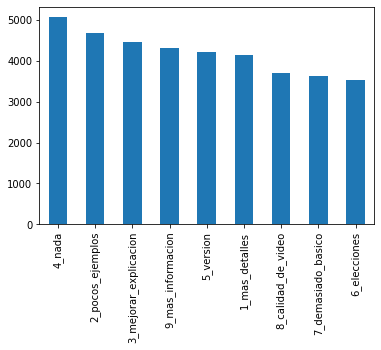

In [200]:
ax = df_dominant_topic['Dominant_Topic'].value_counts().plot(kind='bar')
plt.show()

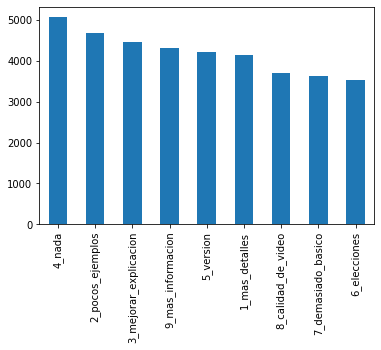

In [201]:
ax = df_news['labels'].value_counts().plot(kind='bar')
plt.show()

The topis are almost balanced, so we are good

finally that we have our models set up, as well as analyzed, we can go
ahead to visualizing them.

In [202]:
import pyLDAvis

pyLDAvis.enable_notebook()

In [203]:
# %%time
import pyLDAvis.gensim
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=          x     y  topics  cluster  Freq
topic                                   
4     -0.04 -0.01       1        1 15.38
0     -0.04  0.01       2        1 15.20
8      0.06 -0.02       3        1 11.34
5     -0.03  0.03       4        1 10.68
7     -0.09 -0.01       5        1 10.50
1      0.04 -0.14       6        1  9.85
6     -0.13  0.01       7        1  9.82
3      0.06  0.13       8        1  9.27
2      0.17 -0.00       9        1  7.97, topic_info=            Term     Freq    Total Category  logprob  loglift
311     eleccion 1,379.00 1,379.00  Default    30.00    30.00
145  explicacion 2,023.00 2,023.00  Default    29.00    29.00
35        explic   905.00   905.00  Default    28.00    28.00
365    explicado 1,774.00 1,774.00  Default    27.00    27.00
325       basico 1,762.00 1,762.00  Default    26.00    26.00
..           ...      ...      ...      ...      ...      ...
92   informacion   146.04 1,773.09   Topic9    -5.15     0.03
846         cada   127.64 1,274.96   Topic9    -5.28     0.23
143       espero   106.24   590.88   Topic9    -5.47     0.81
362     entender   110.76 1,101.86   Topic9    -5.43     0.23
142        cosas   110.63 2,028.59   Topic9    -5.43    -0.38

[755 rows x 6 columns], token_table=      Topic  Freq     Term
term                      
1418      5  0.89  abarcan
3759      2  0.12    about
3759      6  0.03    about
3759      7  0.82    about
3759      9  0.02    about
...     ...   ...      ...
2459      9  0.04  windows
2498      2  0.09     with
2498      5  0.02     with
2498      6  0.02     with
2498      7  0.87     with

[2634 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 9, 6, 8, 2, 7, 4, 3])

In [204]:
len(df_news),df_news.isna().sum()

(37766,
 index               0
 id                  0
 course              0
 rating              0
 comment             0
 user                1
 tag                 0
 comment_cleaned     0
 topic_0             0
 topic_1             0
 topic_2             0
 topic_3             0
 topic_4             0
 topic_5             0
 topic_6             0
 topic_7             0
 topic_8             0
 labels              0
 label_confidence    0
 dtype: int64)

In [205]:
# NOW.... GROUP BY COURSE
# AND GROUP BY LABEL THEN

In [206]:
df_by_course = df_news.groupby("course")
df_agg_by_course = pd.DataFrame(index=df_news["course"].unique())

In [207]:
 df_agg_by_course["comments"] = df_by_course['comment_cleaned'].agg(sum)
 df_agg_by_course.sample(10)

,comments
917328,"[crei, seria, practico, solo, muestra, diapositivas, informacion, gratis, google, quede, bastante, decepcion, empezar, entiendan, concepto, funcion, basico, repetit, presentado, parecer, aprendi, unas, varias, cosas, divert, explica, claramente, embargo, final, cada, clase, practica, deberia, haber, material, instrucciones, hizo, video, deteniendo, video, hacer, pract, agrada, imparte, vide, instructor, truc, increible, aprende, practicando, claros, concept, practico, claro, teoria, practica, instructor, preparado, amplios, conocimientos, ense, basico, conforme, pasa, incrementa, nivel, practicas, recomiendo, aquellas, personas, inician, mundo, desarrollo, saben, fortalezcan, conoc, util, facil, segu, buena, particion, informacion, aprende, saque, school, basico, explic, entendible, persona, conocimientos, html, introduccion, less, grano, practico, hace, comprobaciones, conocimientos, explica, recomed, ...]"
3265718,"[explicado, manera, clara, concisa, ayudo, aprender, historias, usuari]"
3510460,"[instructor, conoce, tem]"
1691106,"[extraordinaria, continuacion, saga, hacking, tico, consigue, enganchar, primer, minuto, extremadamente, recomendable, toda, persona, interese, seguridad, informat]"
3929250,[complet]
1504184,"[entiendo, deberia, claro, ense, pizarra, tradicional, explicaciones, claras, precisas, hace, aquellos, gusta, matemat]"
3422914,"[aprendi, enfoque, databasefirst, hubiere, gustado, profundicen, consultas, complejas, linq, metodos, asincron]"
3245512,"[faltan, ejemplos, ejercici, dedicaba, tematica, energia, solar, mayoria, ejercicios, practicos, resumian, aplicar, formulas, cuyo, desarrollo, quedaba, mostrado, mejora, aspecto, creo, podria, gr]"
579728,"[momento, faltan, ejemplos, implementacion, programa, expl, parece, resumen, completo, avanza, rapido, saltandose, seccion, seguido, varias, veces, indicaciones, herramientas, software, indican, logrado, hacerlos, correr, maquina, virtual, pense, mejor, ademas, habian, videos, profesor, habia, hecho, cosas, explico, hacen, quede, satisfech, pesimo, verdad, ense, puede, buscar, cualquier, persona, manual, studio, gran, estaf, comentas, videos, cosas, habias, mencionado, anterioridad, algun, link, forma, informacion, tard, peor, tomado, todas, clases, podr, resumir, videos, instructor, pasa, habla, habla, habla, videos, ense, absolutamente, solo, pasa, hablando, fraude, total, brinca, pasos, invita, tomar, cursos, paso, sim, instructor, tema, interesante, falta, profundidad, tem, repite, mismo, muchisimas, cosas, importante, aprender, rslogix, ...]"
3349440,"[aunque, conocimiento, basico, cartas, siento, rapido, ciertas, partes, encantado, descripcion, simbolos, terminos, ademas, posibilidad, bajar, cartas, navegacion, recomienda, haga, demostracion, practica, carta, simul, piloto, quiere, mantenerse, recurrente, actualizado, conocimientos, temas, aeronaut]"


In [208]:
 df_agg_by_course["labels"] = df_by_course['labels'].apply(list)
 df_agg_by_course.sample(10)

,comments,labels
1905362,"[profe, diap, jhimi, baja, lenta, materiales, estan, repetidos, sesiones, presentaciones, texto, preste, tomar, linea, segun, opinion, audio, horrible, motiva, segu, audio, bajo, logra, escuchar, clar, pesima, informacion, hablan, nivel, avanzado, pues, definitivamente, herramientas, simples, power, point, repletos, letras, entender, expositor, idea, ense, anza, distancia, igual, solo, diapositivas, repite, cada, clase, actitud, frente, monitor, profesor, deja, desear, definitivamente, valor, excesivo, comprendo, perdida, tiempo, perdida, diner, clase, huev, maestro, carismatico, largo, tedioso, cada, cl, actualziado, divaga, comentari, tono, instructor, inspira, entusiasmo, deberia, animo, disertacion, dinamismo, ocasiones, sonido, bastante, malo, escucha, dic, dudo, capacidad, instructor, audio, molesta, entiende, rest, audio, bajo, temas, confus, ...]","[9_mas_informacion, 2_pocos_ejemplos, 7_demasiado_basico, 7_demasiado_basico, 1_mas_detalles, 8_calidad_de_video, 3_mejorar_explicacion, 8_calidad_de_video, 7_demasiado_basico, 1_mas_detalles, 7_demasiado_basico, 8_calidad_de_video, 7_demasiado_basico, 7_demasiado_basico, 3_mejorar_explicacion, 2_pocos_ejemplos]"
2211750,"[principio, deja, claro, cosas, posteriormente, buscar, cuenta, saber, hac, claro, explicando, momento, principiantes, entonces, fallo, microfono, cal, principiante, programacion, encontre, errores, verdad, gusto, forma, ens, nuevo, tratando, entender, necesit, rapido, momento, explic, referencias, viejas, buscar, existen, cambiaron, puede, crear, confusion, menos, gratuito, mismo, pago, estaria, pidiendo, devolucion, mismo, menos, podria, editar, videos, vean, errores, principi, regresa, propias, palabras, conceptos, basicos, brindando, expresa, confianza, trasmite, habla, informal, entiende, hablar, rap, profesor, explica, enreda, mismo, veces, sabe, decir, sale, ocmo, esper, claro, instructor, empezar, nivel, basico, creo, explica, rapido, manera, superficial, decepcionante, instructor, mismo, confunde, idea, cuales, seran, resultados, hace, codig, interactivo, ...]","[1_mas_detalles, 3_mejorar_explicacion, 9_mas_informacion, 9_mas_informacion, 4_nada, 1_mas_detalles, 7_demasiado_basico, 5_version, 8_calidad_de_video, 8_calidad_de_video, 4_nada, 2_pocos_ejemplos, 5_version, 2_pocos_ejemplos, 8_calidad_de_video, 5_version, 5_version, 4_nada, 2_pocos_ejemplos, 1_mas_detalles, 7_demasiado_basico, 1_mas_detalles, 1_mas_detalles, 8_calidad_de_video, 7_demasiado_basico, 1_mas_detalles, 1_mas_detalles, 1_mas_detalles, 1_mas_detalles, 2_pocos_ejemplos, 3_mejorar_explicacion, 8_calidad_de_video, 1_mas_detalles, 3_mejorar_explicacion, 7_demasiado_basico, 5_version, 1_mas_detalles, 7_demasiado_basico, 2_pocos_ejemplos, 7_demasiado_basico, 4_nada, 6_elecciones, 4_nada, 4_nada, 1_mas_detalles, 7_demasiado_basico, 2_pocos_ejemplos, 5_version, 9_mas_informacion, 5_version, 8_calidad_de_video, 1_mas_detalles, 4_nada, 2_pocos_ejemplos, 9_mas_informacion, 9_mas_informacion, 4_nada, 4_nada, 3_mejorar_explicacion, 3_mejorar_explicacion, 7_demasiado_basico, 3_mejorar_explicacion, 3_mejorar_explicacion, 5_version]"
2402872,"[videos, extraordinarios, encantan, hablan, rapido, conversaciones, trato, hacer, examenes, permite, proxima, pregunta, saca, pagina, ayuda, porfavor, rque, hago, respect]",[5_version]
3044670,"[explicativa, sinceralos, felicito, servicio, aprendido, cosas, nunca, explicaron, ahora, vision, amplia, forex]",[6_elecciones]
2024152,"[explica, consonantes, vocales, esp, gusta, aprendo, rap]","[2_pocos_ejemplos, 3_mejorar_explicacion]"
3533140,"[completo, super, explicado, encanta, ahor]",[9_mas_informacion]
2809495,"[todavia, pronto, valor]",[2_pocos_ejemplos]
1833560,"[claro, didactico, ejercicios, bastante, util]",[3_mejorar_explicacion]
2362298,"[encanta, claro, expl]",[4_nada]
1887796,"[duran, exceptional, instructor, that, have, followed, thru, different, medias, mexican, american, older, person, find, patient, pleasant, teaching

In [209]:
df_agg_by_course.to_csv("udemy_reviews_aggregated.csv.zip", 
           index=False, 
           compression="zip")

try:
  shutil.copy('udemy_reviews_aggregated.csv.zip', udemy_folder + '/udemy_reviews_aggregated.csv.zip')
except:
  pass

# Log-odds-ratio, Informative Dirichlet